In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, windows

# Given parameters
Fs = 5e6  # Sampling frequency (5 MHz)
Fsig = 2e6  # Signal frequency (2 MHz)
A = 1  # Amplitude (1V)
SNR_dB = 50  # Target SNR in dB
N = 1024  # Number of samples
t = np.arange(N) / Fs  # Time vector

# Generate the clean sine wave
signal = A * np.sin(2 * np.pi * Fsig * t)

# Compute noise variance for target SNR
P_signal = (A**2) / 2  # Power of sine wave
P_noise = P_signal / (10**(SNR_dB / 10))  # Noise power
sigma_noise = np.sqrt(P_noise)  # Noise standard deviation

# Generate Gaussian noise and add to signal
noise = sigma_noise * np.random.randn(N)
noisy_signal = signal + noise
################
# FFT computation of the noisy signal
fft_noisy_signal = np.fft.fft(noisy_signal)
fft_signal_abs = np.abs(fft_noisy_signal)
psd_signal = fft_signal_abs ** 2
fft_signal_ideal = np.abs(np.fft.fft(signal))
psd_signal_ideal = fft_signal_ideal ** 2
################
freqs = np.fft.fftfreq(N, 1/Fs) #all the frequency bins from 0 to Fs

#psd = np.abs(fft_signal[:N//2]) ** 2 / N
#freqs = np.fft.fftfreq(N, 1/Fs)[:N//2]
#################

# Identify signal and noise power from PSD
signal_bin = np.argmax(psd_signal)  # Find the index of the peak (signal frequency)
#P_signal_psd = np.sum(psd_signal[signal_bin-1:signal_bin+2])  # Sum around the peak
P_signal_psd = psd_signal[signal_bin]
# Estimate noise power by summing PSD over all other frequencies
P_noise_psd = np.sum(psd_signal) - 2*P_signal_psd

# Compute SNR from PSD
SNR_measured_dB = 10 * np.log10(2*P_signal_psd / P_noise_psd)


print(f"Measured SNR from PSD: {SNR_measured_dB:.2f} dB")

print(signal_bin)
print(P_signal_psd/1024)
print(np.sum(psd_signal)/1024**2)

Measured SNR from PSD: 1.28 dB
410
146.82699707217935
0.5001151146731271


Theoretical Signal Power: 0.50 dB
Theoretical SNR: 49.62 dB
SNR (dB): nan


<ipython-input-13-d64fd3b84f2c>:49: RuntimeWarning: invalid value encountered in log10
  snr_db = 10 * np.log10(signal_power / noise_power_fft)


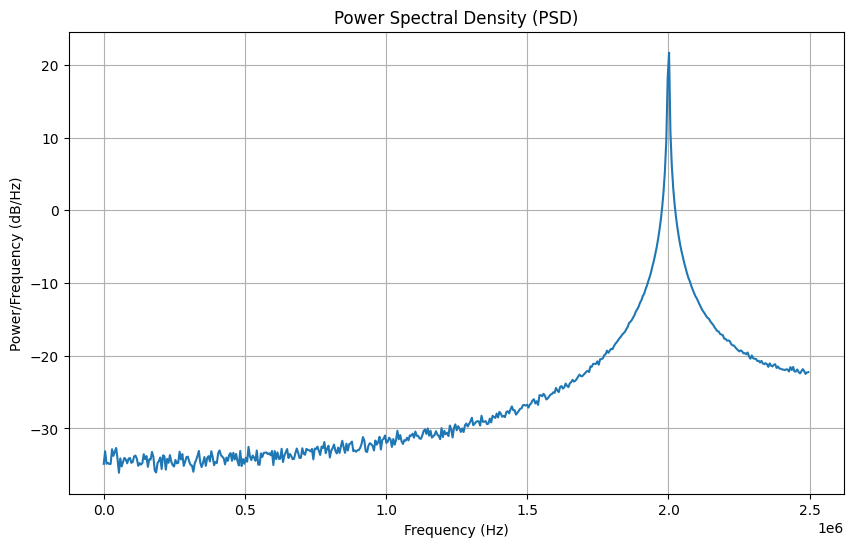

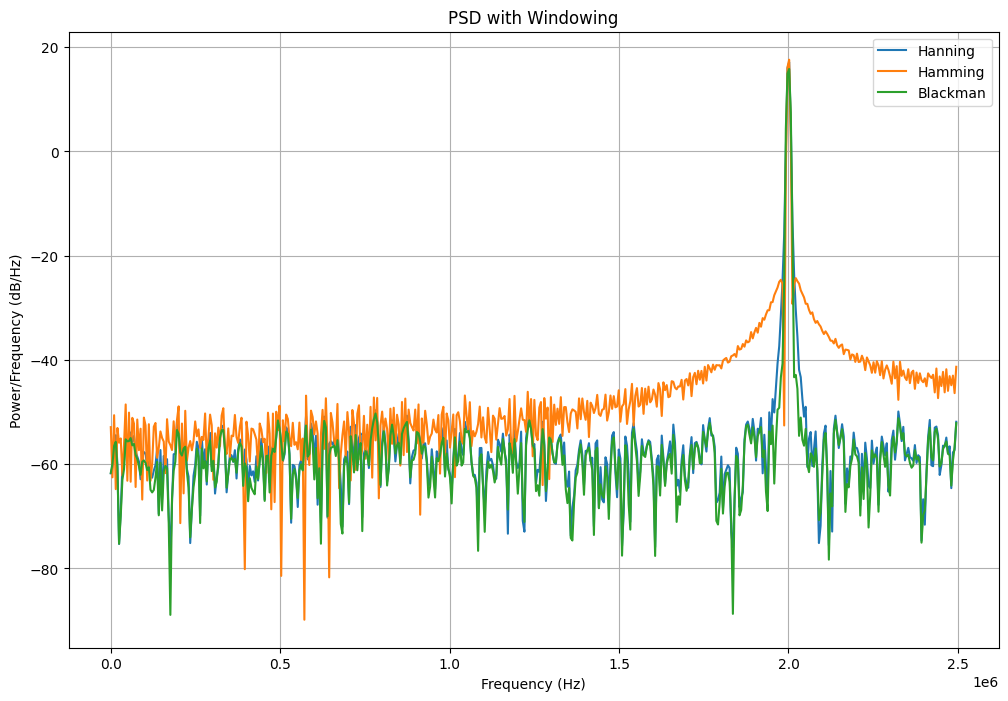

Variance of Gaussian noise: 5.00e-06
Range of uniform noise (a): 7.75e-03


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows

# Parameters
f = 2e6  # signal frequency 2 MHz
Fs = 5e6  # sampling frequency 5 MHz
A = 1.0  # amplitude 1 V
N = 1024  # number of samples
SNR_dB = 50  # target SNR in dB

# Time vector
t = np.arange(N) / Fs # generate sampling time points

# Generate clean sinewave
signal = A * np.sin(2 * np.pi * f * t)

# Calculate noise power
P_signal = (A ** 2) / 2
P_noise = P_signal / (10 ** (SNR_dB / 10))
noise_std = np.sqrt(P_noise)

# Generate Gaussian noise
noise = noise_std * np.random.randn(N)

# Noisy signal
noisy_signal = signal + noise

# Compute actual SNR
measured_signal_power = np.mean(signal**2)
print(f"Theoretical Signal Power: {measured_signal_power:.2f} dB")
measured_noise_power = np.mean(noise**2)
Theoretical_SNR_dB = 10 * np.log10(measured_signal_power / measured_noise_power)
print(f"Theoretical SNR: {Theoretical_SNR_dB:.2f} dB")

# DFT
freqs = np.fft.fftfreq(N, 1/Fs)
#psd = np.abs(np.fft.fft(noisy_signal)) ** 2 / N

X = np.fft.fft(signal)
X_noisy = np.fft.fft(noisy_signal)

#SNR Calculation
idx = np.argmin(np.abs(freqs - f))
signal_power = np.abs(X[idx])**2
noise_power_fft = np.mean(np.abs(X_noisy)**2) - signal_power

# SNR in dB
snr_db = 10 * np.log10(signal_power / noise_power_fft)

print(f"SNR (dB): {snr_db}")

# Plot PSD
plt.figure(figsize=(10, 6))
plt.plot(freqs[:N//2], 10 * np.log10(psd[:N//2]))
plt.title("Power Spectral Density (PSD)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.grid()
plt.show()

# Apply windows
windows_dict = {'Hanning': windows.hann(N), 'Hamming': windows.hamming(N), 'Blackman': windows.blackman(N)}

plt.figure(figsize=(12, 8))
for name, win in windows_dict.items():
    windowed_signal = noisy_signal * win
    psd_win = np.abs(np.fft.fft(windowed_signal)) ** 2 / N
    plt.plot(freqs[:N//2], 10 * np.log10(psd_win[:N//2]), label=name)

plt.title("PSD with Windowing")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.legend()
plt.grid()
plt.show()

# Variance of uniform noise
a = np.sqrt(12 * P_noise)
print(f"Variance of Gaussian noise: {P_noise:.2e}")
print(f"Range of uniform noise (a): {a:.2e}")


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, windows

# Given parameters
Fs = 5e6  # Sampling frequency (5 MHz)
Fsig = 2e6  # Signal frequency (2 MHz)
A = 1  # Amplitude (1V)
SNR_dB = 50  # Target SNR in dB
N = 1024  # Number of samples
t = np.arange(N) / Fs  # Time vector

# Generate the clean sine wave
signal = A * np.sin(2 * np.pi * Fsig * t)

# Compute noise variance for target SNR
P_signal = (A**2) / 2  # Power of sine wave
P_noise = P_signal / (10**(SNR_dB / 10))  # Noise power
sigma_noise = np.sqrt(P_noise)  # Noise standard deviation

noise = sigma_noise * np.random.randn(N)
noisy_signal = signal + noise

In [44]:
signal_fft = np.fft.fft(signal)
signal_fft_abs = np.abs(signal_fft)

power_signal = signal_fft_abs ** 2
print(np.mean(power_signal)/1024)
power_signal = np.mean(power_signal)/N
print(power_signal)

noise_fft = np.fft.fft(noise)
noise_fft_abs = np.abs(noise_fft)

power_noise = noise_fft_abs ** 2
power_noise = np.mean(power_noise)/N
print(power_noise)

calculated_SNR = 10*np.log10(power_signal/power_noise)
print(f"Theoretical SNR: {calculated_SNR:.2f} dB")


noisy_signal_fft = np.fft.fft(noisy_signal)
noisy_signal_fft_abs = np.abs(noisy_signal_fft)
#X = noisy_signal_fft_abs[:N//2]
#psd_noisy_signal1 = X ** 2
psd_noisy_signal = noisy_signal_fft_abs ** 2
P_total = np.mean(psd_noisy_signal)/N
#idx = np.argmax(psd_noisy_signal)
#psignal = psd_noisy_signal[idx] / N
pnoise = P_total - power_signal
calculated_SNR = 10*np.log10(power_signal/pnoise)
print(f"SNR: {calculated_SNR:.2f} dB")

0.5001508872042826
0.5001508872042826
4.835626408098713e-06
Theoretical SNR: 50.15 dB
SNR: nan dB


<ipython-input-44-d9319a66c506>:29: RuntimeWarning: invalid value encountered in log10
  calculated_SNR = 10*np.log10(power_signal/pnoise)


146.89415880581836
nan


<ipython-input-87-1d1c8a952489>:10: RuntimeWarning: invalid value encountered in log10
  calculated_SNR = 10*np.log10(psignal/pnoise)


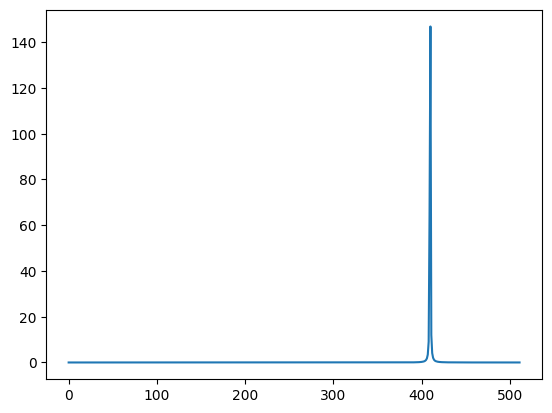

In [ ]:
plt.plot(noisy_signal_fft_abs[:N//2]**2 / 1024)
np.mean(noisy_signal_fft_abs[:N//2]**2 / 1024)
idx = np.argmax(noisy_signal_fft_abs[:N//2] ** 2)
psignal = noisy_signal_fft_abs[:N//2][idx]
psignal = psignal ** 2 / 1024
print(psignal)

P_total = np.mean(noisy_signal_fft_abs[:N//2] ** 2) / 1024
pnoise = P_total - psignal
calculated_SNR = 10*np.log10(psignal/pnoise)
print(calculated_SNR)

In [43]:
print(np.mean(psd_noisy_signal)/1024)
print(power_signal)
print(10*np.log10(power_signal/pnoise))

0.5001383912456177
0.5001508872042826
nan


<ipython-input-43-e237ad6bc06b>:3: RuntimeWarning: invalid value encountered in log10
  print(10*np.log10(power_signal/pnoise))


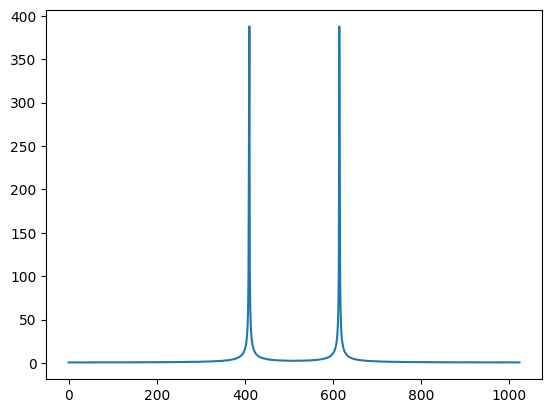

In [42]:
plt.plot(noisy_signal_fft_abs)